In [1]:
import sys 
from    StaccatoLab import *
import  numpy as np
import  matplotlib.pyplot  as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
version()

'StaccatoLab: version alpha.11'

### Minor assignment *Counter Flow*

Given graph `G` below. All nodes have default (single-rate) flow behavior.
(Note how list comprehensions have been used to program "near regularity".)

1. Simulate graph `G` for a number of cycles. Explain behavior.
2. What is the minimum number of initial tokens to achieve a periodic behavior? 
What is the token rate on edge `b[0]` in this schedule?
(Use `e.init(D=n)` to initialize edge `e` with `n` tokens.)
3. What is the minimum number of initial tokens to achieve rate=1?
(Copy-paste the graph into a new cell, and add cells for `view/sim/plot` as needed.)

Note: demonstrate both periodic behavior and rate=1 by means of simulation and `G.plot_flow()`.

Grading for the 3 questions: [2, 4, 4]

Gcf (Graph)       : no errors (flow-only graph)


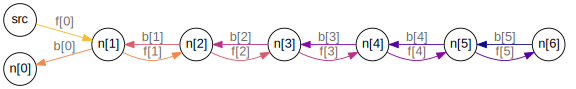

In [2]:
N     = 7
Gcf   = Graph()
G     = Gcf
G.src = Node ()
G.n   = [Node() for i in range(N)]
G.f   = Path([G.src]+G.n[1:])
G.b   = Path(G.n, reverse=True)
G.build()
G.samerank=[G.n[0], G.src]
G.plot_graph()

### Question 1

We first copy the graph given by a new function for later use.

In [3]:
def get_origin_graph():
    N     = 7
    Gcf   = Graph()
    G     = Gcf
    G.src = Node ()
    G.n   = [Node() for i in range(N)]
    G.f   = Path([G.src]+G.n[1:])
    G.b   = Path(G.n, reverse=True)
    return Gcf

Then we can plot the graph again to have a check.

Gcf (Graph)       : no errors (flow-only graph)


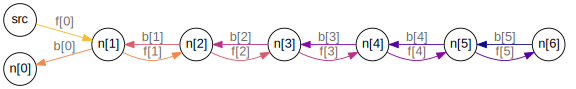

In [4]:
Gcf = get_origin_graph()
Gcf.build()
Gcf.samerank=[G.n[0], G.src]
Gcf.plot_graph()

It is obvious that we get the same graph. Now we can start question 1 by simulations on `Gcf`. 

In [5]:
Gcf.view(sim=True)

Output()

 #cycles real time  cpu time   #events  SDF=Y    rate=1.000 Hz
       2     2.00s      0.1s         1  quiescence


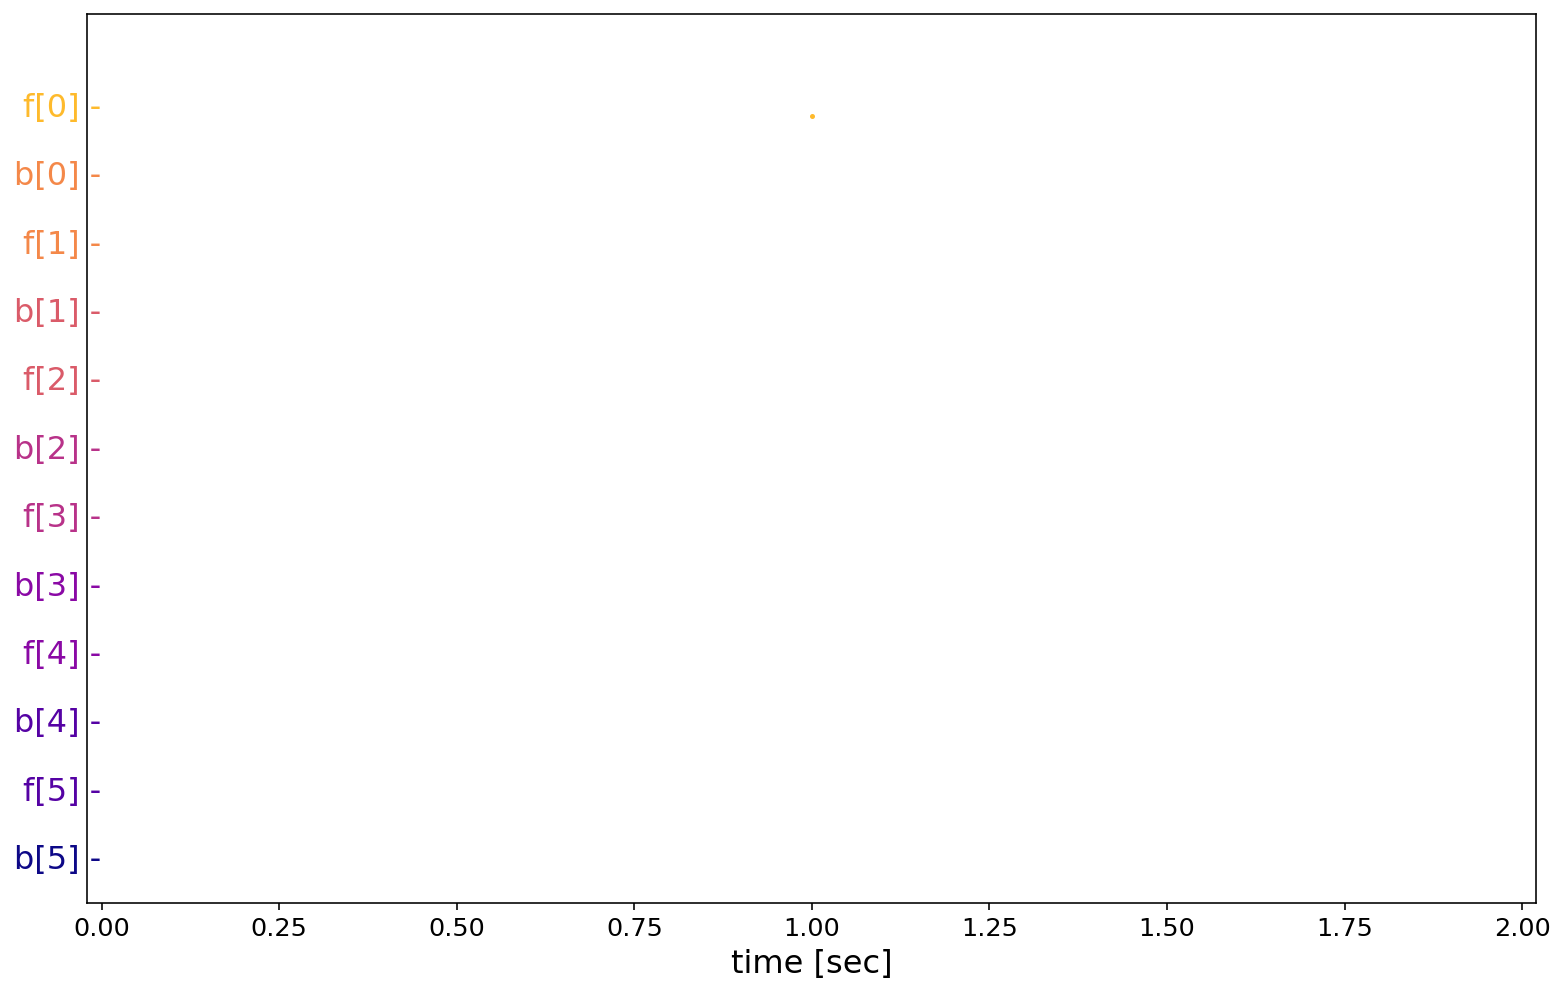

In [6]:
Gcf.sim(T=20)
Gcf.plot_flow();

We can observe that the manual simulation by `Gcf.view()` shows that after 2 cycle, deadlock occurs (`quiescene`), and another simulation by `Gcf.sim()` returns a flow plot with only one point and `quiescence` also indicating that there is deadlock in the graph.

A node can fire if and only if there are enough tokens on each input edge and enough slack on each output edge. In this case, after `src` firing, `n[1]` cannot fire because there is no tokens on edge `b[1]`, conducing blocking on all following nodes. Meanwhile, node `src` cannot fire again, because the slack of edge `f[0]` is 0. Hence, there will be nothing happening in the future, i.e. deadlock.

### Question 2

The minimum number of initial tokens to achieve a periodic behavior is 5. Concretely, assigning exactly 1 token on edge `b[1]` to `b[5]` will achieve periodic scheduling. In this case, the token rate on edge `b[0]` is 0.5 per cycle in this schedule. We first motivate this answer by simulations.

G_Q2 (Graph)      : no errors (flow-only graph)


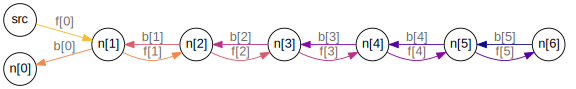

In [7]:
G_Q2 = get_origin_graph()
for i in range(1, 6):
    G_Q2.b[i].init(D=1)
G_Q2.build()
G_Q2.samerank=[G.n[0], G.src]
G_Q2.plot_graph()

We can check and conclude that the modifications are successfully set by hovering over the edge labels. Then we perform the following simulation to demonstrate our solution:

 #cycles real time  cpu time   #events  5(2)*  rate=1.000 Hz
      20     20.0s      0.0s       106  lasso=5(2)*
      20     20.0s      0.0s       106  pause


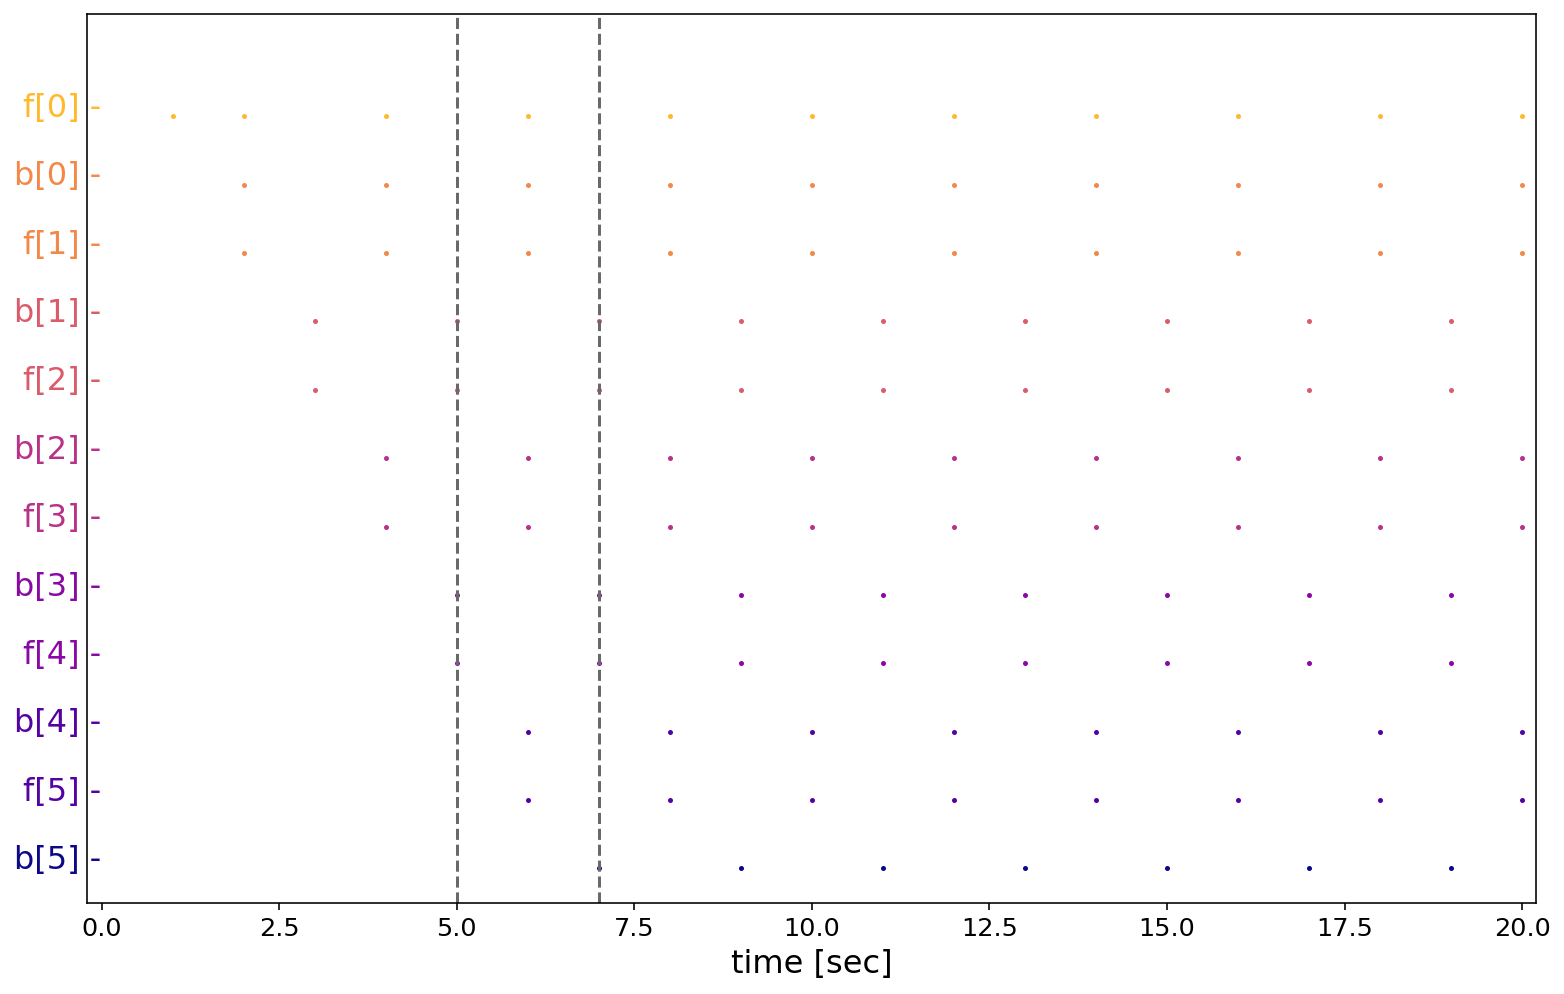

In [8]:
G_Q2.sim(T=20)
G_Q2.plot_flow();

We can see that the simulation returns `lasso=5(2)*`, indicating that the graph will have a period of length 2 after 5 cycles, demonstrating the feasibility of our method. And we can observe the row of `b[0]`, the tokens are generated every two cycles, so the token rate of `b[0]` is 0.5 per cycle (second).

#### Reasons

According to the analysis from last question, we know that the graph suffers deadlock because there are no enough tokens on each input of `n[1]`. Actually, if we only assign tokens for node `n[1]`, the same situation will reappear for node `n[2]`, and so on. So we need to assign tokens to ensure node `n[1]` to `n[5]` can fire by adding one initial token on edge from `b[1]` to `b[5]`.

Therefore, the minimum number of initial tokens to achieve a periodic behavior is 5. And in this case, the token rate of `b[0]` is 0.5 per cycle (second).

### Question 3

The minimum number of initial tokens to achieve `rate=1` is **10**. Concretely, we need to assign exactly 2 tokens on edge `b[1]` to `b[5]`. First we need to modify the graph for later simulations.

G_Q3 (Graph)      : no errors (flow-only graph)


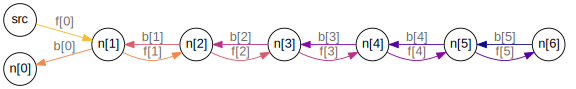

In [9]:
G_Q3 = get_origin_graph()
for i in range(1, 6):
    G_Q3.b[i].init(D=2)
G_Q3.build()
G_Q3.samerank=[G.n[0], G.src]
G_Q3.plot_graph()

We can check and conclude that the modifications are successfully set by hovering over the edge labels. Then we perform the following simulation to demonstrate our solution:

 #cycles real time  cpu time   #events  6(1)*  rate=1.000 Hz
      20     20.0s      0.0s       216  lasso=6(1)*
      20     20.0s      0.0s       216  pause


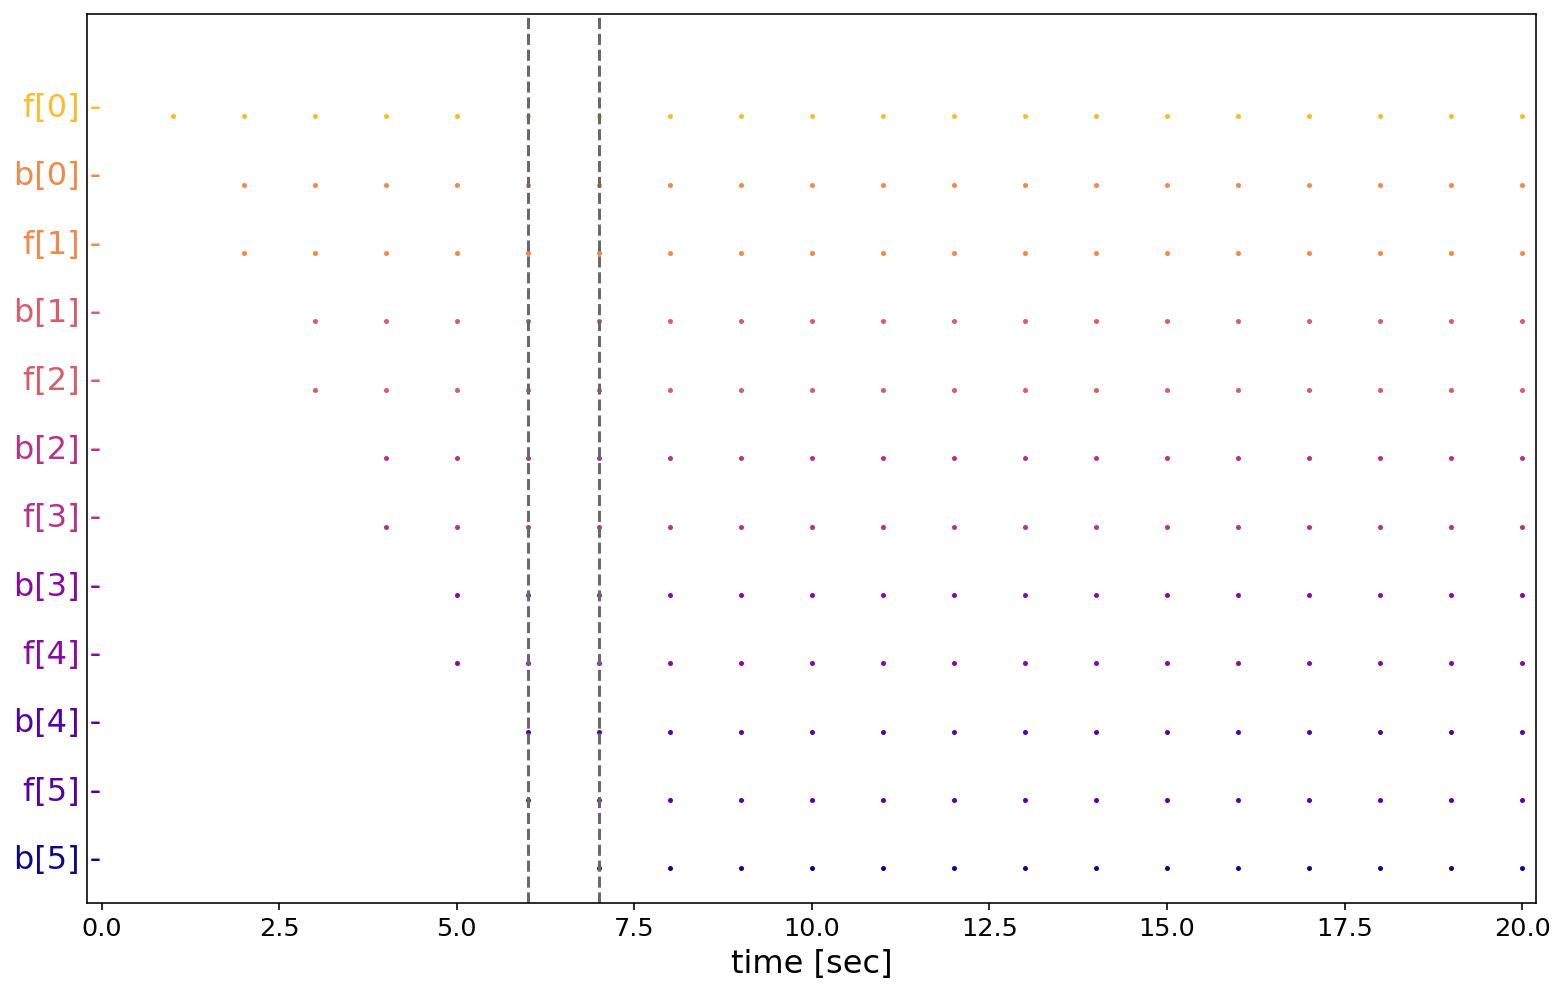

In [10]:
G_Q3.sim(T=20)
G_Q3.plot_flow();

As we can see, the simulation returns `lasso=6(1)*`, indicating that the graph will have a period of length 1 after 6 cycles, demonstrating that our method achieves `rate=1`.


#### Reasons

To ensure the period of the graph `G_Q3` is 1, is equivalent to make the maximum cycle mean (MCM) $\mu_{G\_Q3}=1$. From the lecture 2, we have the cycle mean of a loop $c$ is
$$
\mu_C = \frac{\sum t_C}{\sum d_C}
$$
where $\sum t_C$ is the total execution time of nodes in loop $c$, and $\sum d_C$ is the total number of tokens on the edges in loop $c$. And the MCM $\mu_G$ is the max of $\mu_C$. In this graph, there are 5 loops, and we need to ensure $\mu_C$ of every loop is no more than 1. Due to the fact that the minimum number of initial tokens is required, making $\mu_C$ of every loop is feasible. $\sum t_C$ for every loop is 2, so we ought to assign 2 tokens initially into each loop. Hence, there are `2*5=10` tokens in total that need to be allocated.